In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [12]:
# Load and split the MNIST dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a 1D array
    Dense(128, activation='relu'),   # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),    # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 digits and softmax activation
])


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2404 - accuracy: 0.9299
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1038 - accuracy: 0.9680
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0708 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0550 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0426 - accuracy: 0.9862


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9789
Test accuracy: 0.9789000153541565


In [17]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 1ms/step


In [18]:
# Save the model to a file
model.save("digit_recognition_model.h5")


In [19]:
# Load the saved model
loaded_model = tf.keras.models.load_model("digit_recognition_model.h5")

# Make predictions using the loaded model
predictions = loaded_model.predict(test_images)

# Get the predicted labels
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]


313/313 [==============================] - 1s 2ms/step


In [20]:
loaded_model = tf.keras.models.load_model("digit_recognition_model.h5")


In [25]:
from PIL import Image
import numpy as np


In [30]:
from google.colab import files
uploaded = files.upload()

Saving sample.png to sample.png


In [31]:
# Load the image using PIL
image_path = "sample.png"  # Replace with the actual image path
image = Image.open(image_path)

In [32]:
# Preprocess the image
# Resize the image to 28x28 pixels and convert to grayscale
preprocessed_image = image.resize((28, 28)).convert('L')
preprocessed_image_array = np.array(preprocessed_image) / 255.0  # Normalize pixel values


In [33]:
# Expand dimensions and make predictions
new_image = np.expand_dims(preprocessed_image_array, axis=0)  # Add a batch dimension
predictions = loaded_model.predict(new_image)
predicted_label = np.argmax(predictions[0])  # Get the index of the predicted class

1/1 [==============================] - 0s 71ms/step


In [34]:
# Display predictions and image
print("Predicted label:", predicted_label)

Predicted label: 2


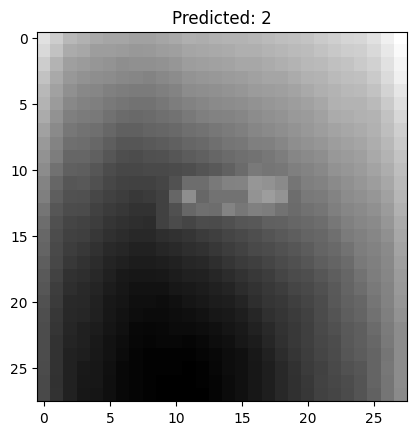

In [35]:
import matplotlib.pyplot as plt

plt.imshow(preprocessed_image_array, cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()